<h1 style="text-align: center; font-size: 40px; font-weight: bold; color: #E63737;">🏥Heart Disease Classifier🩺❤️</h1>
<h2 style="text-align: center; font-weight: normal; color: #555555;">For Beginners✌️</h2>
<hr>

<div align="center">
  <h2 style="font-weight: bold; color: #555555;">🎯 Problem Statement 🧠💡</h2>
  <p style="font-size: 16px; font-weight: bold; color: #555555;">In this project, we will learn basic machine learning concepts by exploring the problem of heart disease classification. We will build a binary classifier which will classify <em style="color: #808080;">(predict)</em> the target <em style="color: #808080;">(patient)</em> had disease or not. <em style="color: #808080;">(1=yes, 0=no)</em></p>
</div>


<div align="center">
 <h1 style="font-weight: bold; color: #555555;">📚 Section 1: Importing Required Libraries 📊</h1>
</div>
<hr>
<p>In this section, we import the necessary libraries that will be used throughout the project. <em style="color: #808080;">To tidy up the things we'll do this in the beginning.</em> </p>

* **NumPy** (shortened to `np`) and **Pandas** (shortened to `pd`) for data manipulation and analysis. 
* **Matplotlib** and **Seaborn** for data visualization and plotting. 
* `%matplotlib inline` for displaying plots within the notebook. 
* **Logistic Regression**, **K-Nearest Neighbors**, and **Random Forest** classifiers for building machine learning models. 
* **Train Test Split**, **Cross Validation Score**, **Randomized Search CV**, and **Grid Search CV** for model evaluation and optimization. 
* **Confusion Matrix**, **Classification Report**, **Precision Score**, **Recall Score**, **F1 Score**, and **ROC Curve Display** for evaluating model performance and accuracy. 

In [1]:
#Libraries for Exploratory Data Analysis [EDA]
import numpy as np
import pandas as pd

#Plotting Libraries 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Libraries for making ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Libraries for Evaluating the model
from sklearn.model_selection import train_test_split , cross_val_score , RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report , precision_score , recall_score , f1_score , RocCurveDisplay

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<div align="center">
  <h1 style="font-weight: bold; color: #555555;">Section 2: Load & Explore the Data 📑</h1>
</div>
<hr>

In this section, we will load the dataset from a .csv file and store it inside a Pandas dataframe using the `read_csv()` function.

After loading the dataset, we need to become more familiar with the data, which will help us during building and evaluating our model.

### Exploratory Data Analysis (EDA) Steps:
1. Understand the problem statement and see if our data can help to solve it.
2. See what's available in the data.
3. Deal with missing values and outliers.
4. Add/Change/Remove features to get more out of the data, also known as feature engineering.

Performing EDA is crucial as it allows us to gain insights into the dataset, identify any data quality issues, handle missing values or outliers, and potentially enhance the dataset through feature engineering.






In [2]:
df = pd.read_csv("/kaggle/input/processed-dataset-for-heart-disease-classifier/Dataset_Heart_Disease_classifier.csv")

In [3]:
df.shape # This will display the rows and colums in our dataset

(303, 14)

In [4]:
#Now getting a quick overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#To understand the data better use describe() function 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.795380,246.257426,0.148515,0.528053,149.759076,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.574187,51.832956,0.356198,0.525860,22.481885,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,135.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#rows = int(input("Enter the number of rows you want to see from beginning."))
rows = 10  #Comment tis line if uncommenting the previous one.
df.head(rows)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [7]:
#The following function shows how many times each of the values of a categorical column appear.
print(df.target.value_counts())
#By passing the parameter normalize = True , we can get the values in percentage
print("Values in percentages :\n",df.target.value_counts(normalize = True)*100,)

1    165
0    138
Name: target, dtype: int64
Values in percentages :
 1    54.455446
0    45.544554
Name: target, dtype: float64


<AxesSubplot: >

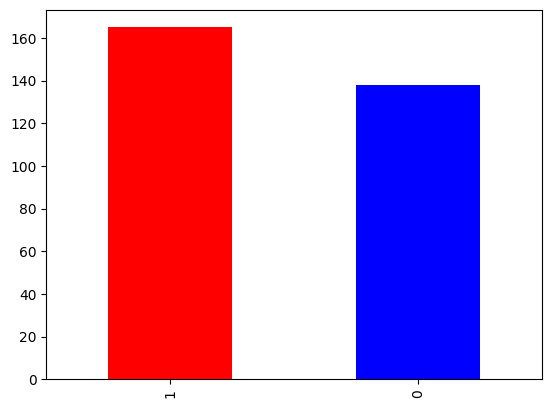

In [8]:
#Visualizing the Tagets data 
df.target.value_counts().plot(kind = "bar", color = ["red","blue"])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

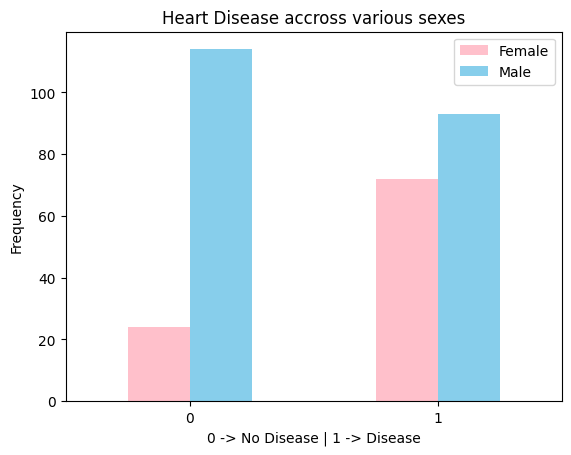

In [9]:
#Visualize Heart Disease distribution according to sexes

pd.crosstab(df.target,df.sex).plot(kind = "bar", color = ["pink","skyblue"]);
plt.title("Heart Disease accross various sexes")
plt.xlabel("0 -> No Disease | 1 -> Disease")
plt.ylabel("Frequency")
plt.legend(["Female" , "Male"])
plt.xticks(rotation = 0) #To keep the x-axis labels straight 

## Visualize Heart Disease for different Ages & Max Heart rates

In [10]:
df.age.value_counts() # Age Distribution 

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

<AxesSubplot: ylabel='Frequency'>

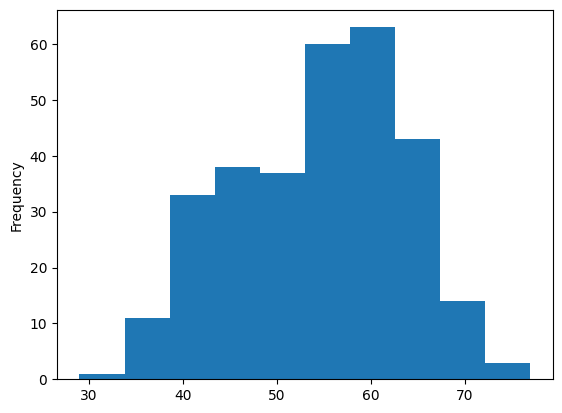

In [11]:
df.age.plot.hist()

This distribution is too large for a bra graph, thus we'll use scatter plot

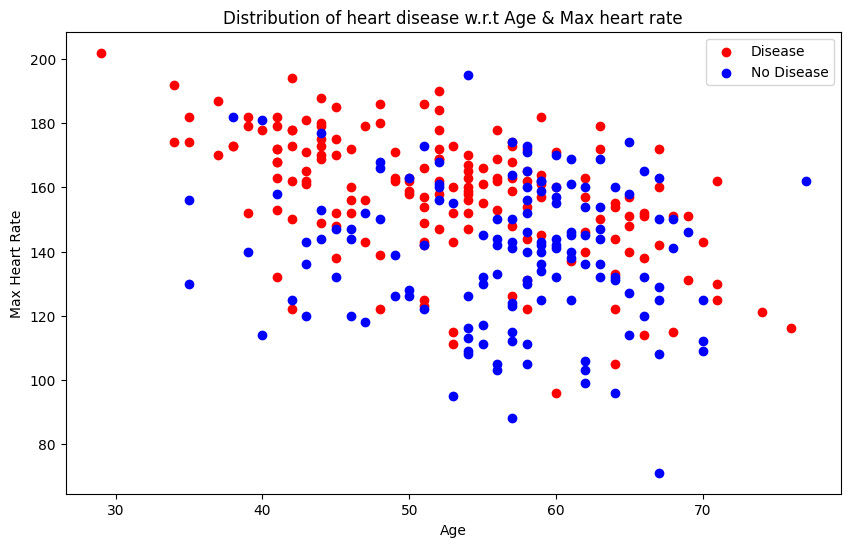

In [12]:
#Creating another figure for this visualization
plt.figure(figsize = (10,6))

# Plotting for different labels

plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
           color = "red")
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
           color = "blue")
plt.title("Distribution of heart disease w.r.t Age & Max heart rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

## Heart Disease Distribution wrt Chest Pain type

In [13]:
#Exploring Data
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

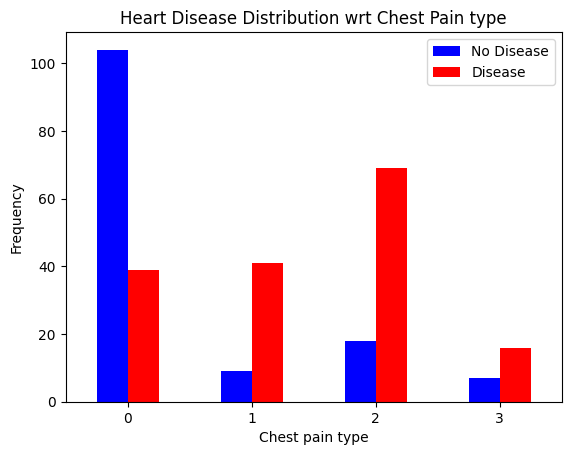

In [14]:
#Creating Visualization
pd.crosstab(df.cp,df.target).plot(kind = "bar",
                                 color = ["blue" , "red"])
plt.title("Heart Disease Distribution wrt Chest Pain type")
plt.xlabel('Chest pain type')
plt.ylabel('Frequency')
plt.legend(["No Disease" , "Disease"])
plt.xticks(rotation = 0) #To keep the x-axis labels straight 

## Getting Correlation between different independent variables

<AxesSubplot: >

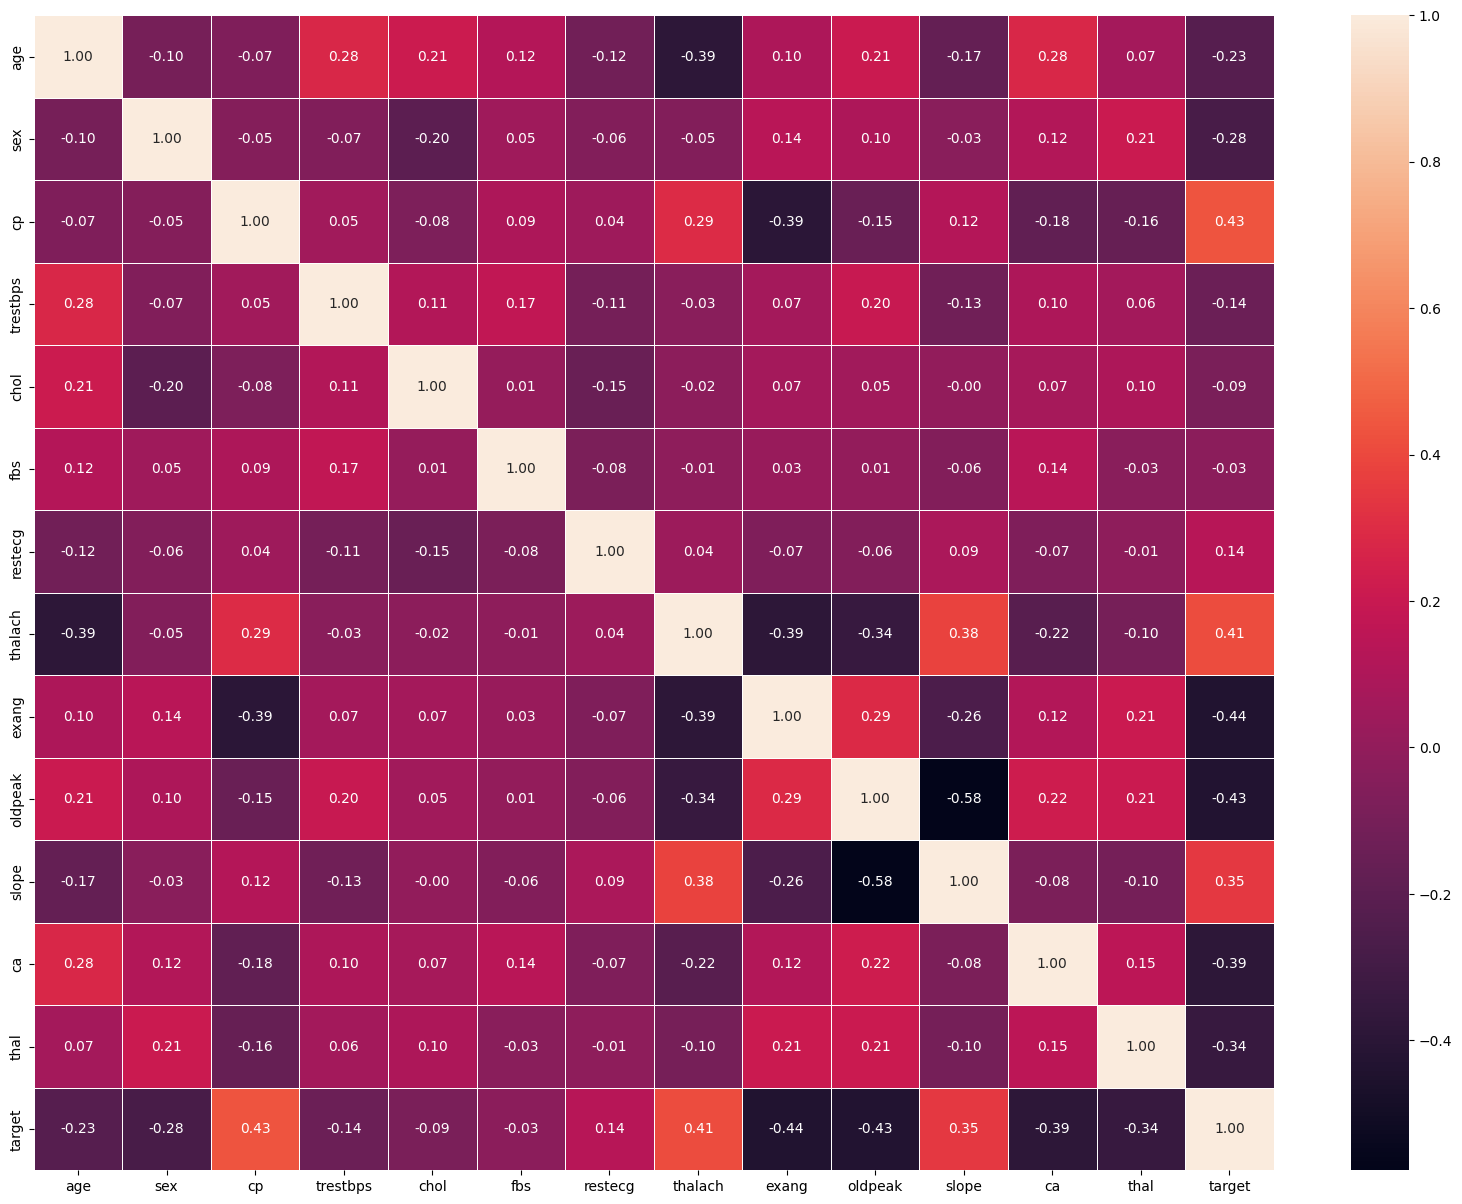

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize = (20,15))
sns.heatmap(correlation_matrix ,
           annot = True,
           linewidths = 0.5,
           fmt = ".2f")

## Preparing the Dataset


In [16]:
#First preparing the labels
Y = df.target.values
#Now dropping off the labels form the dataset
X = df.drop("target",axis = 1)

In [17]:
#Now performing Training and testind split

#Setting up random seed for reproducibility
np.random.seed(51)

#Now splitting the data
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2)

In [18]:
Y_train, len(Y_train) , Y_test , len(Y_test)

(array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1]),
 242,
 array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1

## Modelling

Here we will make the following models and compare their outputs
1. Logistic Regression
2. KNeighboursClassifier
3. RandomForestClassifier

In [19]:
#First putting all the models in a dictionary

models = {"KNN" : KNeighborsClassifier(),
         "Logistic Regression" : LogisticRegression(),
         "Random Forest" : RandomForestClassifier()}

#Now creating a finction to fit and score models

def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    #Setting up a random seed
    np.random.seed(42)
    
    #Making a lsit to store model scores
    model_scores = {}
    
    #Loop through models
    

    for name,model in models.items():
        #Fit the model  to the data
        model.fit(X_train,Y_train)
        #Evaluate the model and store the scores in model_scores list
        model_scores[name] = model.score(X_test,Y_test)
    return model_scores

In [20]:
model_scores = fit_and_score(models,X_train,X_test,Y_train,Y_test)
print(model_scores)

{'KNN': 0.7049180327868853, 'Logistic Regression': 0.8524590163934426, 'Random Forest': 0.819672131147541}


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Comparision

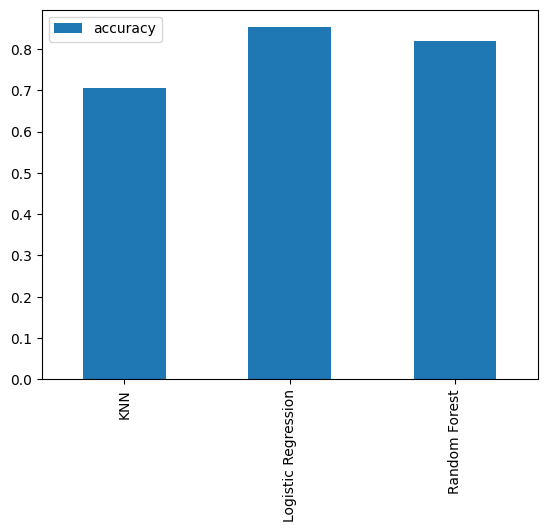

In [21]:
model_compare = pd.DataFrame(model_scores,index = ['accuracy'])
model_compare.T.plot.bar();

## Hyperparatemter tuning


In [22]:
#First tuning KNN
# The default value of K in KNN is k = 5, now we will experiment for different values of k

train_scores = [] #This is a list for training scores
test_scores = [] #This is a list for testing scores
knn = KNeighborsClassifier()
k_values = range(1,25)

#Loop throught different values of k

for i in k_values:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train,Y_train)
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))


Maximum KNN score on the test data: 75.41%


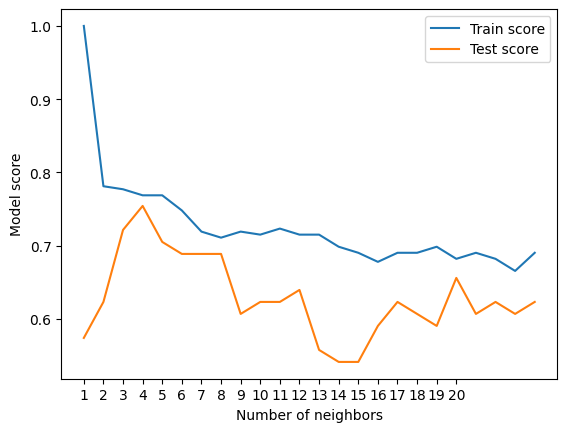

In [23]:
plt.plot(k_values, train_scores, label="Train score")
plt.plot(k_values, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Now tuning LogisticRegression & RandomForestClassifier

The hyperparameters used for each model here are defined in two seperate dictionaries `log_reg_grid` and `rf_grid`:

For Logistic Regression, the hyperparameters used are:

- `C`: The inverse of regularization strength, with values ranging from 0.0001 to 10,000. Higher values of C indicate less regularization, allowing the model to fit more complex patterns in the data.
- `solver`: The algorithm to be used for optimization. Here, the "liblinear" solver is used, which is recommended for small datasets.

For Random Forest Classifier, the hyperparameters used are:

- `n_estimators`: The number of decision trees to be included in the random forest. Values range from 10 to 1000, with increments of 50.
- `max_depth`: The maximum depth of each decision tree in the forest. Values include `None`, which means that nodes will be expanded until all leaves are pure, and 3, 5, and 10, which represent the maximum number of levels in the tree.
- `min_samples_split`: The minimum number of samples required to split a node. Values range from 2 to 20, with increments of 2.
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. Values range from 1 to 20, with increments of 2.

In [24]:
log_reg_grid = {"C":np.logspace(-4,4-20),
               "solver":["liblinear"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

### Tuning the Logistic Regression model using RandomizedSearchCV

The code you provided is using scikit-learn's `RandomizedSearchCV` class to perform a randomized search for the best hyperparameters for a Logistic Regression model.

Here's a breakdown of the code:

1. `RandomizedSearchCV` is a class that performs hyperparameter tuning by sampling a fixed number of combinations from a specified hyperparameter distribution.
2. The first argument `LogisticRegression()` is the estimator object, which represents the Logistic Regression model.
3. `param_distributions` is set to `log_reg_grid`, which is the dictionary of hyperparameters defined earlier.
4. `cv=5` specifies a 5-fold cross-validation strategy. It means the data will be split into 5 equal parts, and the model will be trained and evaluated 5 times, with each part serving as the validation set once.
5. `n_iter=20` determines the number of parameter settings that will be sampled. In this case, 20 different combinations of hyperparameters will be tested.
6. `verbose=True` prints detailed information about the progress of the search.

Once this code is executed, the `RandomizedSearchCV` object `rs_log_reg` will be created and can be used to fit the data and find the best hyperparameters for the Logistic Regression model.

In [25]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

In [26]:
# Fit random hyperparameter search model
rs_log_reg.fit(X_train, Y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [27]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 5.689866029018293e-05}

In [28]:
rs_log_reg.score(X_test, Y_test)

0.6065573770491803

### Now doing the same with Random forest Classifier

In [29]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

In [30]:
rs_rf.fit(X_train, Y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [31]:
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [32]:
rs_rf.score(X_test, Y_test)

0.819672131147541

## Tuning the mdoels with GridSearchCV

* RandomizedSearchCV - tries n_iter combinations of hyperparameters and saves the best.
* GridSearchCV - tries every single combination of hyperparameters and saves the best.

In [33]:
log_reg_grid = {"C":np.logspace(-4,4-20),
               "solver":["liblinear"]}
 

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)

gs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 5.68986603e-05, 3.23745754e-05, 1.84206997e-05,
       1.04811313e-05, 5.96362332e-06, 3.39322177e-06, 1.93069773e-06,
       1.09854114e-06, 6.25055193e-07, 3.55648031e-07, 2.02358965e-07,
       1.15139540e-07, 6.55128557e-08, 3.72759372e-08, 2.12095089e-08,
       1.20679264e-08, 6.86648845e-09, 3.906939...
       1.38949549e-11, 7.90604321e-12, 4.49843267e-12, 2.55954792e-12,
       1.45634848e-12, 8.28642773e-13, 4.71486636e-13, 2.68269580e-13,
       1.52641797e-13, 8.68511374e-14, 4.94171336e-14, 2.81176870e-14,
       1.59985872e-14, 9.10298178e-15, 5.17947468e-15, 2.94705170e-15,
       1.67683294e-15, 9.54095476e-16, 5.42867544e-16, 3.08884360e-16,
       1.75751062e-16, 1.00000000e-16]),
                         'solver': ['liblinear']},
             verbose=True)

In [34]:
gs_log_reg.score(X_test,Y_test)

0.6557377049180327

## Evaluating the  model

* ROC curve and AUC score - plot_roc_curve()
* Confusion matrix - confusion_matrix()
* Classification report - classification_report()
* Precision - precision_score()
* Recall - recall_score()
* F1-score - f1_score()

In [35]:
# First we'll get our model predictions on the test data

Y_preds = gs_log_reg.predict(X_test)
Y_preds

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1])

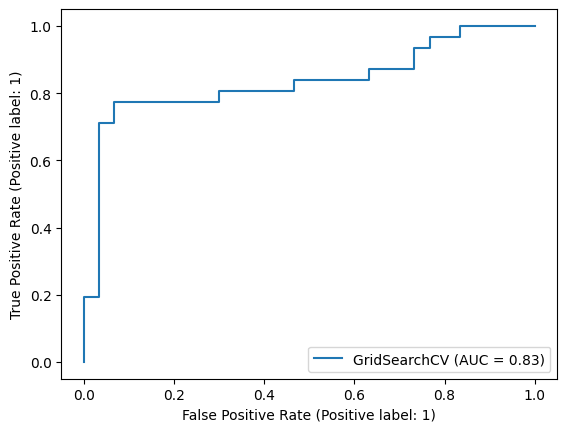

In [36]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gs_log_reg,X_test,Y_test)

In [37]:
print(confusion_matrix(Y_test, Y_preds))

[[14 16]
 [ 5 26]]


### Confusion Matrix

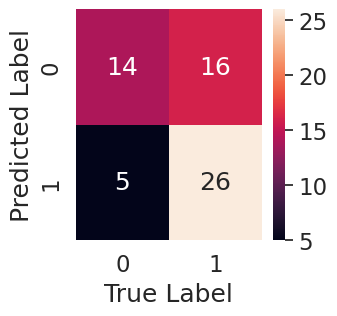

In [38]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_pred):
    """
    Plots a confusion matrix using heatmap
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred),
                    annot = True)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(Y_test,Y_preds)    

### Classification Report

In [39]:
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.74      0.47      0.57        30
           1       0.62      0.84      0.71        31

    accuracy                           0.66        61
   macro avg       0.68      0.65      0.64        61
weighted avg       0.68      0.66      0.64        61



In [40]:
#Checking the best hyper parameters 
gs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [41]:
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
classifier = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [42]:
#Cross_validation accuracy score
cv_acc = cross_val_score(classifier,
                        X,Y,cv=5,scoring = "accuracy")
cv_acc

array([0.81967213, 0.8852459 , 0.86885246, 0.86666667, 0.75      ])

In [43]:
cv_acc = np.mean(cv_acc)

In [44]:
cv_acc

0.8380874316939891

In [45]:
#Now getting cross validation Precision Score
cv_precision = np.mean(cross_val_score(classifier,
                        X,Y,cv=5,scoring = "precision"))

In [46]:
cv_precision

0.8150793650793651

In [47]:
#Now getting cross validation Recall Score
cv_recall = np.mean(cross_val_score(classifier,
                        X,Y,cv=5,scoring = "recall"))

In [48]:
cv_recall

0.9151515151515153

In [49]:
#cross validation f1 score
cv_f1 = np.mean(cross_val_score(classifier,
                        X,Y,cv=5,scoring = "f1"))

In [50]:
cv_f1

0.8614184446857956

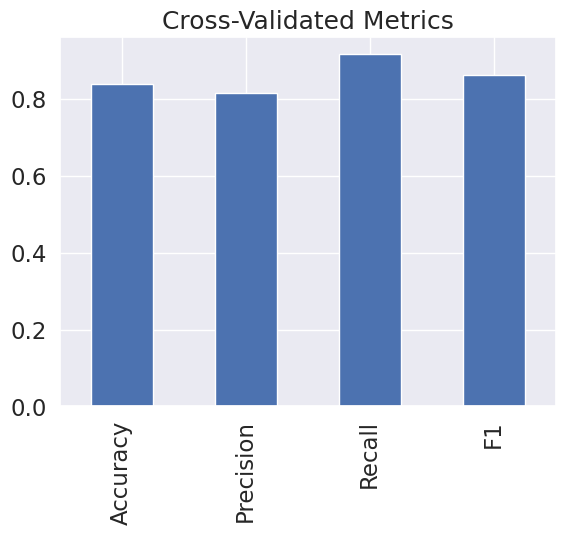

In [51]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

## Feature Importance

In [52]:
#Checking importance of each Feature:
classifier.fit(X_train,Y_train)
classifier.coef_

array([[ 9.96676575e-03, -9.40419825e-01,  7.54918444e-01,
        -1.22896694e-02, -1.79298820e-04, -2.41796867e-02,
         2.93808307e-01,  2.00229616e-02, -6.62010587e-01,
        -6.01330015e-01,  3.61753110e-01, -6.20733843e-01,
        -5.27736505e-01]])

In [53]:
#Match features to their names
features_dict = dict(zip(df.columns,list(classifier.coef_[0])))
features_dict

{'age': 0.009966765751958831,
 'sex': -0.9404198251057191,
 'cp': 0.7549184441948219,
 'trestbps': -0.012289669426780142,
 'chol': -0.0001792988195702451,
 'fbs': -0.02417968666146135,
 'restecg': 0.2938083066436352,
 'thalach': 0.02002296157173423,
 'exang': -0.6620105872501258,
 'oldpeak': -0.601330015016602,
 'slope': 0.361753110216065,
 'ca': -0.6207338430677841,
 'thal': -0.527736504789098}

<AxesSubplot: title={'center': 'Feature Importance'}>

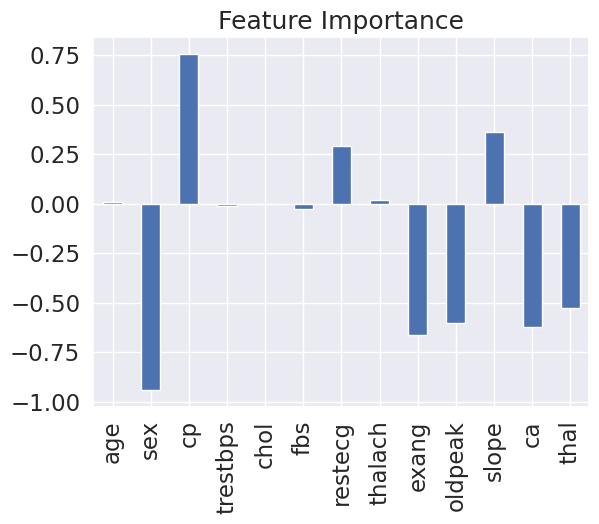

In [54]:
#Now visualizing feature importance
features_df = pd.DataFrame(features_dict,index=[0])
features_df.T.plot.bar(title="Feature Importance",legend = False)